### Imports

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import datasets
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

C:\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Python39\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Defining labels for ranking scores:
def convert_labels(x):
    y = []
    for i in range(len(x)):
        y.append([(199.9-0.9*x[i][0])/199])
        # y.append([201-x[i][0]])
    return np.array(y)

In [3]:
#Reading data:
dataX = pd.read_csv('../datasets/spotofy_music_normalized.csv')
dataX.head()
m = len(dataX) # Number of  examples
X = np.array(dataX)

dataY = pd.read_csv('../datasets/spotofy_music_labels.csv')
dataY.head()
Y = np.array(dataY)
Y = convert_labels(Y)
Y.tofile('../datasets/hitscore.csv',sep=',')
# print(Y)

### Analysis using LR models

In [4]:
#Using K-fold cross-validation for data and fitting the model and apply regularization:
kf = KFold(n_splits=10)
temp__ = 0.0000001
alphas1 = []
alphas2 = []
for i in range(0, 102):
    alphas1.append(temp__+ 0.00001)
    alphas2.append(temp__+ 0.00001)
    temp__ +=0.0001
res = []
res2 = []
cnt = 0
for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = Lasso()
    model2 = Ridge()
    cnt += 1
    # Lasso Implementation
    grid = dict()
    grid['alpha'] = alphas1
    grid_ = GridSearchCV(estimator=model,param_grid=dict(alpha=alphas1))
    results = grid_.fit(X_train, y_train)

    # print('Alpha: %s' % results.best_estimator_.alpha)
    clf = Lasso(alpha=results.best_estimator_.alpha)
    clf.fit(X_train, y_train)
    np.savetxt('../weights/lasso_split_'+str(cnt)+'.txt', clf.coef_, delimiter=" ", fmt="%f")
    predictY2 = clf.predict(X_test)
    res.append([results.best_estimator_.alpha,mean_squared_error(y_test, predictY2)])

    # Ridge Implementation
    grid2 = dict()
    grid2['alpha'] = alphas2
    grid2_ = GridSearchCV(estimator=model2,param_grid=dict(alpha=alphas2))
    results2 = grid2_.fit(X_train, y_train)

    clf2 = Ridge(alpha = results2.best_estimator_.alpha)
    clf2.fit(X_train,y_train)
    np.savetxt('../weights/ridge_split_'+str(cnt)+'.txt', clf2.coef_, delimiter=" ", fmt="%f")
    predictY22 = clf2.predict(X_test)
    res2.append([results2.best_estimator_.alpha,mean_squared_error(y_test, predictY22)])
    
    

AttributeError: 'Lasso' object has no attribute 'coef_'

In [ ]:
res.sort(key = lambda x: x[0])
res2.sort(key = lambda x: x[0])
# print(res2)

total_rmse_lasso = 0
total_rmse_ridge = 0

for i in range(10):
    total_rmse_lasso += res[i][1]
    total_rmse_ridge += res2[i][1]

print("Average Lasso RMSE Error = ",str(total_rmse_lasso/10))
print("Average Ridge RMSE Error = ",str(total_rmse_ridge/10))

Average Lasso RMSE Error =  0.06506282532572856
Average Ridge RMSE Error =  0.06500578639801066


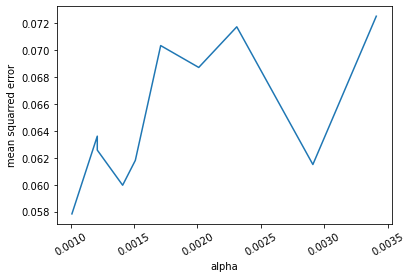

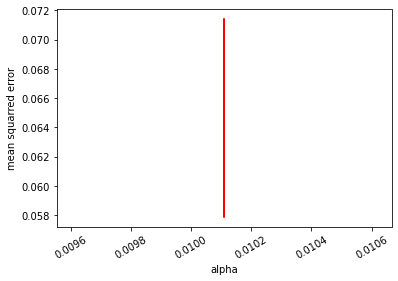

In [ ]:
#Plotting MSE v/s alphas
import matplotlib.pyplot as plt
plt.plot([i[0] for i in res], [i[1] for i in res])
plt.xlabel('alpha')
plt.ylabel('mean squarred error')
plt.xticks(rotation=30)
plt.show()

plt.figure()
plt.plot([i[0] for i in res2], [i[1] for i in res2],'r')
plt.xlabel('alpha')
plt.ylabel('mean squarred error')
plt.xticks(rotation=30)
plt.show()

The GridSearchCV in case of Ridge Regression return the same value of alpha for all folds, unlike in the case of Lasso Regression. However, the predicted values do vary over the different folds, with a minimum value of around 0.035 and max of around 0.44.

In [ ]:
with open('L1.txt','w+') as f:
    f.write(str(res))

## Baseline Linear Regression

In [ ]:
dataY = pd.read_csv('../datasets/spotofy_music_labels.csv')
Y = np.array(dataY)
Y = convert_labels(Y)
# Y.tofile('datasets/binary_labels.csv',sep=',')
print(Y)

[[1.        ]
 [0.99547739]
 [0.99095477]
 ...
 [0.33517588]
 [0.1361809 ]
 [0.12261307]]


In [ ]:
#Using K-fold cross-validation for data and fitting the model:

from sklearn.metrics import mean_squared_error
num_folds = 5
kf = KFold(n_splits=num_folds)

i = 1
total_error = 0
cnt = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    cnt += 1
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    np.savetxt('../weights/linear_split_'+str(cnt)+'.txt', regressor.coef_, delimiter=" ", fmt="%f")
    y_predicted = regressor.predict(X_test)
    score = mean_squared_error(y_test,y_predicted)
    print(f"Score on Fold {i} = ", score)
    total_error += score
    i += 1

print("\nAverage Error = ",str(total_error/num_folds))

Score on Fold 1 =  0.07147165316877974
Score on Fold 2 =  0.06459568385686822
Score on Fold 3 =  0.06744590556665211
Score on Fold 4 =  0.059590480863886706
Score on Fold 5 =  0.06239086218085212

Average Error =  0.06509891712740777


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
# from scipy import stats
from scipy import stats
tStat, pValue = stats.ttest_ind(y_pred, y_test, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the P-Value and the T-Statistic

P-Value:[0.46616511] T-Statistic:[-0.72901159]


In [ ]:
stats.f_oneway(y_pred, y_test)

F_onewayResult(statistic=array([0.5314579]), pvalue=array([0.46609511]))